# Questions

###  a) Importer les librairies

In [ ]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# settings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### b) Télecharger et lire le fichier "sales_train.csv" dans un "DataFrame" nomé 'sales'

In [ ]:
sales = pd.read_csv("sales_train.csv")





In [ ]:
sales=pd.read_csv("sales_train.csv")

### c) Affichier les 5 premières lignes

In [ ]:
sales.head(5)




,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### d) Determiner les dimensions de ce fichier 

In [ ]:
sales.shape





(1048575, 6)

### e) affichier les colonnes du tableau

In [ ]:
sales.columns





Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

### f) affichier le type des variables

In [ ]:
sales.dtypes





date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

### g) Est ce qu'il y a des types de variables à corriger? si oui lesquels ? et comment on peut corriger ce problème ?

In [ ]:
# Oui nous devons changer le type de la date car elle est un objet.

sales.date= pd.to_datetime(sales.date)






In [ ]:
sales.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [ ]:
sales.date

0         2013-02-01
1         2013-03-01
2         2013-05-01
3         2013-06-01
4         2013-01-15
             ...    
1048570   2013-07-11
1048571   2013-11-18
1048572   2013-11-24
1048573   2013-11-11
1048574   2013-11-26
Name: date, Length: 1048575, dtype: datetime64[ns]

### h) Est-ce qu'il ya duplication des données?

In [ ]:
sales.duplicated().sum()

# Oui, il y a une duplication de données





1

In [ ]:
sales=sales.drop_duplicates()

In [ ]:
sales.duplicated().sum()

0

### i) Est-ce qu'il ya des valeurs aberrantes? Si oui comment on peut resoudre ce problème?

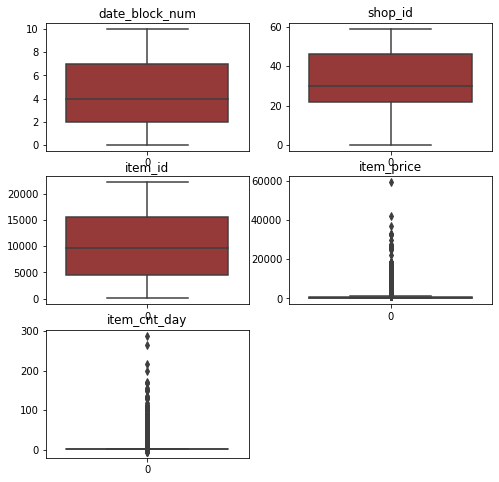

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.subplot(321)
sns.boxplot(data=sales['date_block_num'], color='brown')
plt.title("date_block_num")
plt.subplot(322)
sns.boxplot(data=sales["shop_id"], color='brown')
plt.title("shop_id")
plt.subplot(323)
sns.boxplot(data=sales['item_id'], color='brown')
plt.title('item_id')
plt.subplot(324)
sns.boxplot(data=sales['item_price'], color='brown')
plt.title('item_price')
plt.subplot(325)
sns.boxplot(data=sales['item_cnt_day'], color='brown')
plt.title('item_cnt_day')
plt.show()






<function matplotlib.pyplot.show>

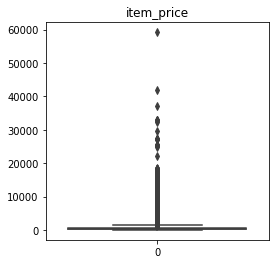

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(data=sales['item_price'], color='brown')
plt.title('item_price')
plt.show

# Il y a des valeurs aberrantes pour item_price

In [ ]:
q1=sales.item_price.quantile(q=0.25)
q3=sales.item_price.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

1449.0

In [ ]:
sales = sales.loc[(sales.item_price<=1449)]

<function matplotlib.pyplot.show>

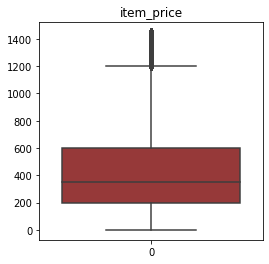

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(data=sales['item_price'], color='brown')
plt.title('item_price')
plt.show

<function matplotlib.pyplot.show>

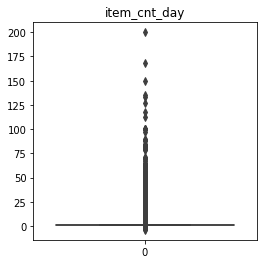

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(data=sales['item_cnt_day'], color='brown')
plt.title('item_cnt_day')
plt.show

# Il y a des valeurs aberrantes pour item_cnt_day

In [ ]:
q1=sales.item_cnt_day.quantile(q=0.25)
q3=sales.item_cnt_day.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

1.0

In [ ]:
sales = sales.loc[(sales.item_cnt_day<=1)]

<function matplotlib.pyplot.show>

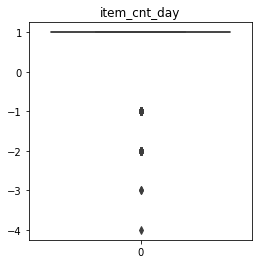

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(data=sales['item_cnt_day'], color='brown')
plt.title('item_cnt_day')
plt.show

In [ ]:
q1=sales.item_cnt_day.quantile(q=0.25)
q3=sales.item_cnt_day.quantile(q=0.75)
IQR=q3-q1
borne_inf=q1-1.5*IQR
borne_inf

1.0

In [ ]:
sales = sales.loc[(sales.item_cnt_day>=1)]

<function matplotlib.pyplot.show>

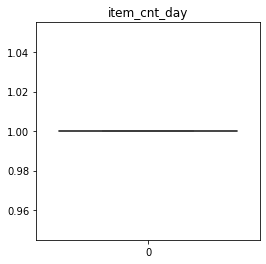

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(data=sales['item_cnt_day'], color='brown')
plt.title('item_cnt_day')
plt.show

### j) Est-ce qu'il ya des valeurs manquantes? Si oui comment on peut resoudre ce problème?

In [ ]:
sales.isna().sum()

# Il n'y a pas de valeurs manquantes.
# S'il y avait présence de valeur manquante, nous aurions utilisé la méthode par interpolation





date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

### k) Tracer la serie temporelle 'item_price' en fonction du temps ('date')

In [ ]:
sales.index = sales['date'] 





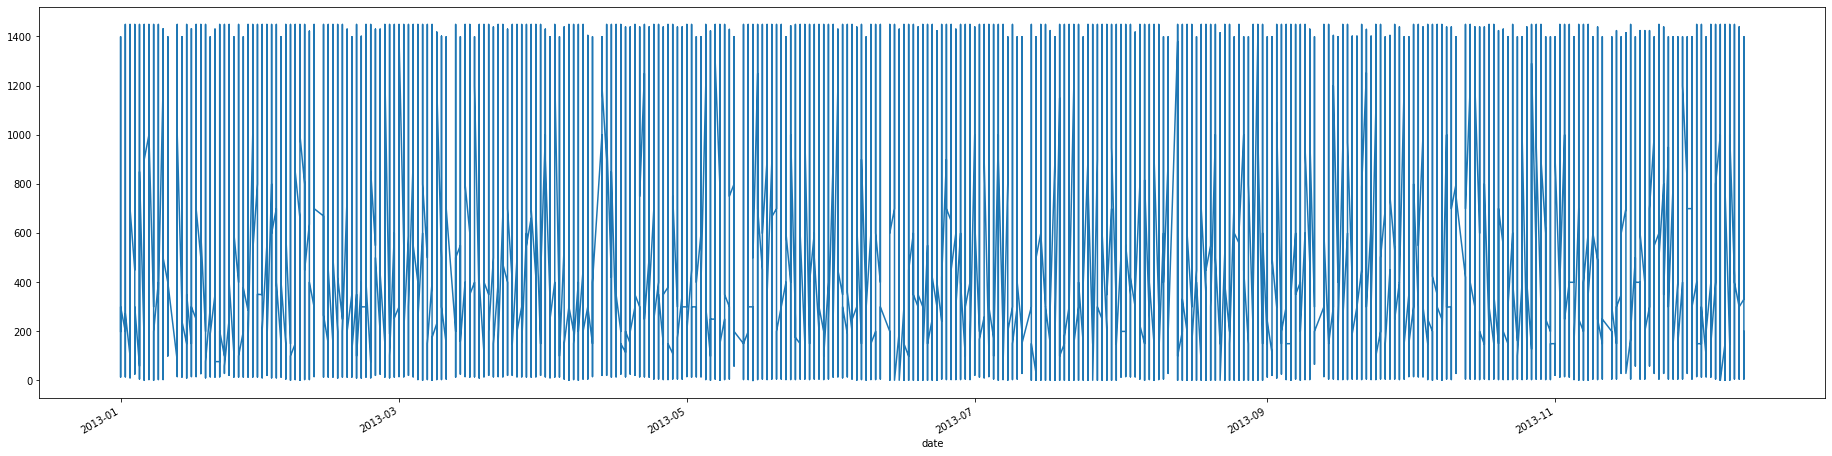

In [ ]:
sales['item_price'].plot(figsize=(32,8))

### l) Decrire à travers son graphique : variation, modèle, tendance et saisonalités

Tendance: oui
sainonalité : oui
modèle additif





### m) tourner le code suivant et expliquer-le

In [ ]:
monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})
monthly_sales.head(20)

# Regrouper par date_block_num,"shop_id et item_id les dates minimum et maximum, la moyenne d'item_price et la somme d'item_cnt_day.

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-25 2013-01-31      221.0          2.0
                       33      2013-01-17 2013-03-01      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
                       61      2013-10-01 2013-10-01      195.0          1.0
                       75      2013-01-17 2013-01-17       76.0          1.0
                       88      2013-01-16 2013-01-16       76.0          1.0
                       95      2013-06-01 2013-06-01      193.0          1.0
                       96      2013-10-01 2013-10-01       70.0          1.0
                       98      2013-01-13 2013-12-01      268.0         11.0
                       111     2013-01-17 2013-01-17       89.0          1.0
                       149     2013-01-17 2013-11-01       99.0          3.0
                       151     2013-01-16 2013-01-16       75.0          1.0
                       153     2013-09-01 2013-09-01      258.0          1.0
                       198     2013-10-01 2013-10-01      112.0          1.0
                       210     2013-01-25 2013-05-01      118.0          2.0
                       282     2013-04-01 2013-04-01      109.0          1.0
                       306     2013-01-22 2013-01-22       59.0          1.0
                       351     2013-01-21 2013-01-21       89.0          1.0

### n) Télecharger et lire le fichier "Customers_in_a_Shop.csv" dans un "DataFrame" nomé 'CUST'

In [ ]:
cust=pd.read_csv("Customers_in_a_Shop.csv")





In [ ]:
cust

,1949-01,114
0,1949-02,120.0
1,1949-03,134.0
2,1949-04,67.0
3,1949-05,123.0
4,1949-06,137.0
...,...,...
138,1960-08,606.0
139,1960-09,508.0
140,1960-10,720.0
141,1960-11,750.0


In [ ]:
cust.columns=['date','data']

In [ ]:
cust

,date,data
0,1949-02,120.0
1,1949-03,134.0
2,1949-04,67.0
3,1949-05,123.0
4,1949-06,137.0
...,...,...
138,1960-08,606.0
139,1960-09,508.0
140,1960-10,720.0
141,1960-11,750.0


### o) Est-ce qu'il ya des valeurs aberrantes? Si oui comment on peut resoudre ce problème?

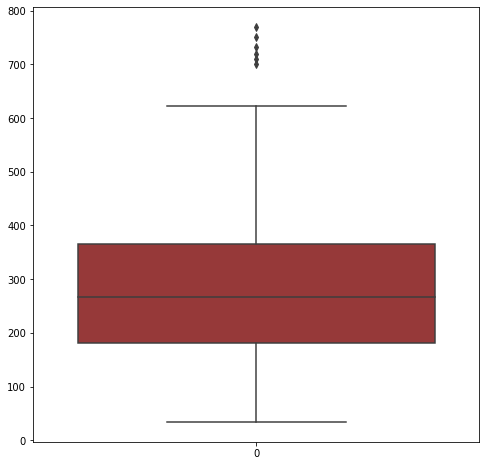

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(data=cust.data, color='brown')

# Oui il y a des valeurs abberrantes en partie supérieure

In [ ]:
q1=cust.data.quantile(q=0.25)
q3=cust.data.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

643.0

In [ ]:
cust = cust.loc[(cust.data<=643)]


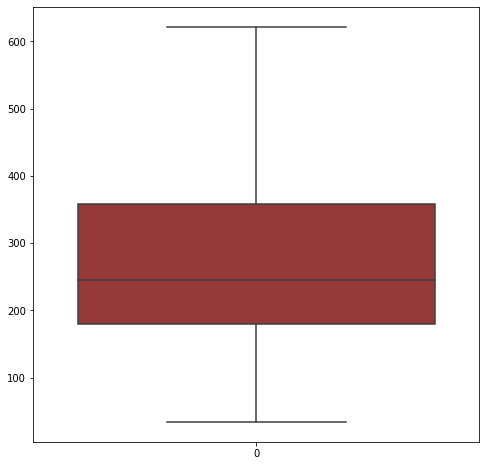

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(data=cust.data, color='brown')

### p) Est-ce qu'il ya des valeurs manquantes? Si oui comment on peut resoudre ce problème?

In [ ]:
cust.data.isna().sum()

# Il n'y a pas de valeurs manquantes





0

### q) Tourner le code suivant, expliquer-le et commenter les resultats

In [ ]:
cust.index = cust['date'] 

In [ ]:
del cust['date']

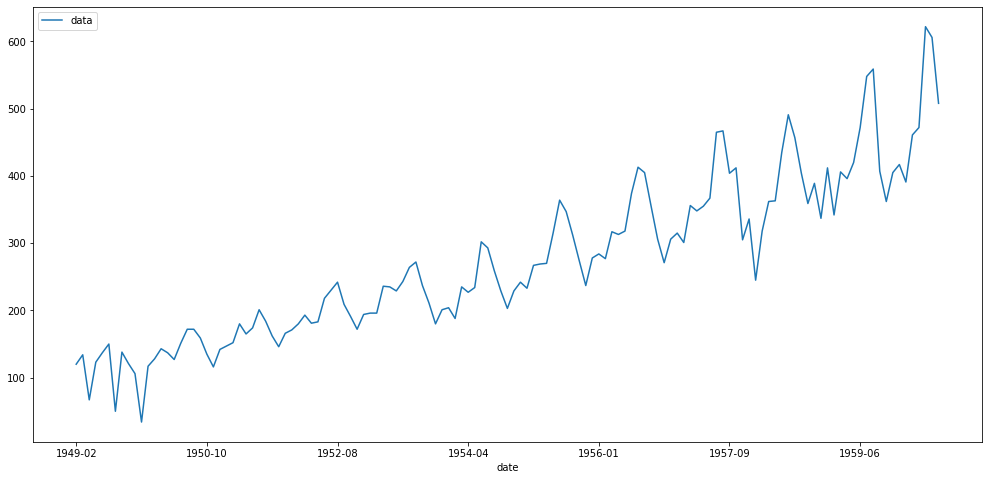

In [ ]:
cust.plot()

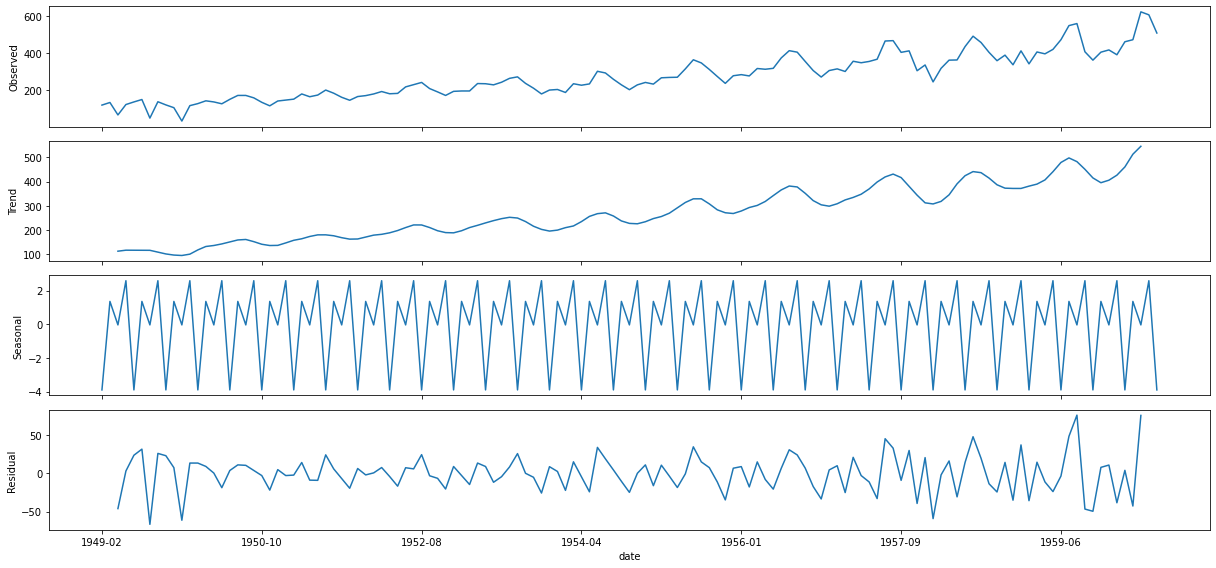

In [ ]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(cust['data'], model='additive', freq=4)
decomposition.plot()
                                          
plt.show()

# Observed: courbe observée de notre model
# Trend: courbe de la tendance -> à la hausse
# Seasonnal: saisonnalité -> il y a une saisonnalité
# Residual: Courbe des résidus
# modèle multiplicatif

### r) Verifier la stationnarité avec le test : ADF( Augmented Dicky Fuller Test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(cust['data'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


# La P-value est de 0,997 donc > à 5%, mon modèle n'est donc pas stationnaire.

ADF Statistic: 1.3874921056212541
n_lags: 11
p-value: 0.9970565731671683
Critial Values:
   1%, -3.485585145896754
Critial Values:
   5%, -2.885738566292665
Critial Values:
   10%, -2.5796759080663887


### s) Verifier la stationnarité avec le test : Kwiatkowski-Phillips-Schmidt-Shin (KPSS) 

In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(cust.data)
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# La P-value est de 0,01 donc < à 5%, mon modèle n'est pas stationnaire



KPSS Statistic: 1.0586908140289222
p-value: 0.01
num lags: 13
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


### t) Transformer la serie stationnaire à l'aide de  " boxcox "

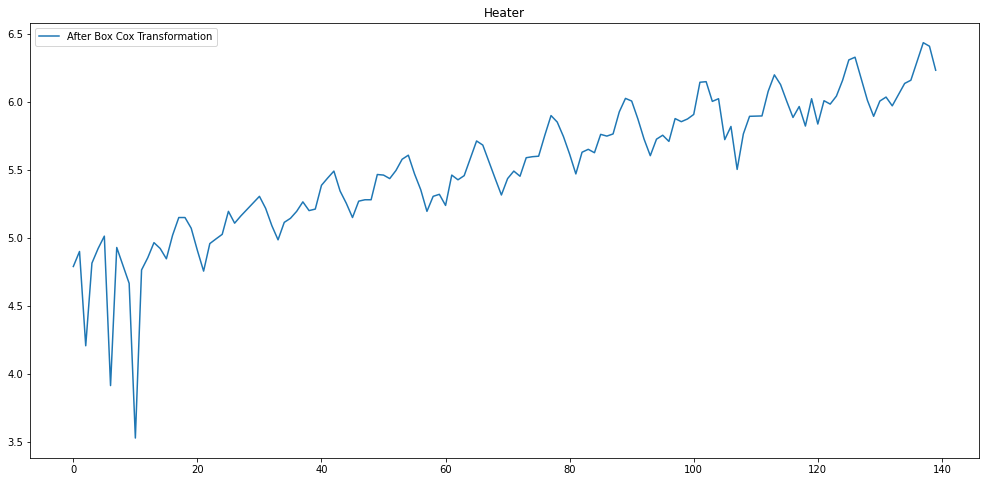

In [ ]:
from scipy.stats import boxcox
cust_stat=pd.Series(boxcox(cust['data'],lmbda=0),index=cust.index)
plt.plot(cust_stat, label="After Box Cox Transformation")
plt.legend(loc='best')
plt.title("Heater")
plt.show()




### u)  Transformer la serie stationnaire à l'aide de  " boxcox "

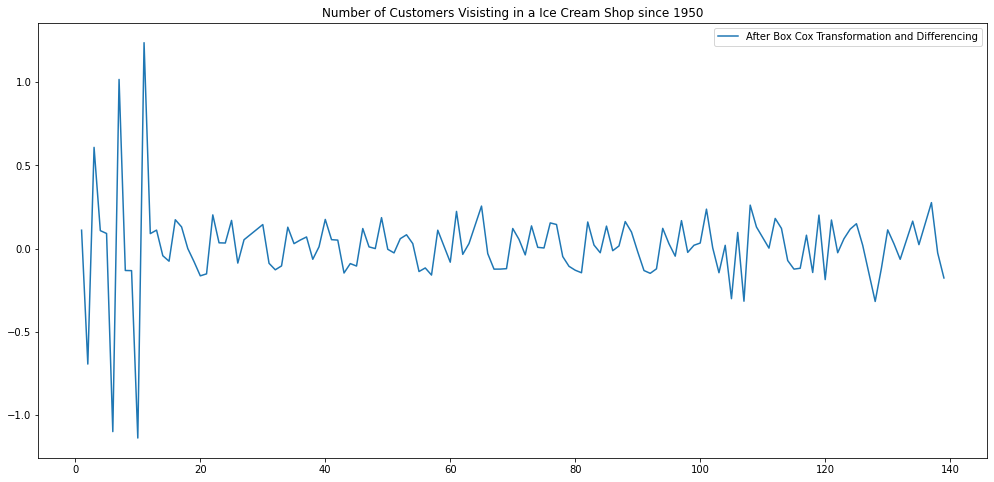

In [ ]:
# After Box Cox Transformation and Differencing

cust_stat_diff= pd.Series(cust_stat-cust_stat.shift(), index=cust_stat.index)
cust_stat_diff.dropna(inplace=True)
plt.plot(cust_stat_diff, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()





In [ ]:
result = adfuller(cust_stat_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

# La P-value de -7,89 est < à 5% donc mon modèle est stationnaire

ADF Statistic: -7.894049946906929
n_lags: 10
p-value: 4.358670221237822e-12
Critial Values:
   1%, -3.485585145896754
Critial Values:
   5%, -2.885738566292665
Critial Values:
   10%, -2.5796759080663887


### v) Tracer le ACF

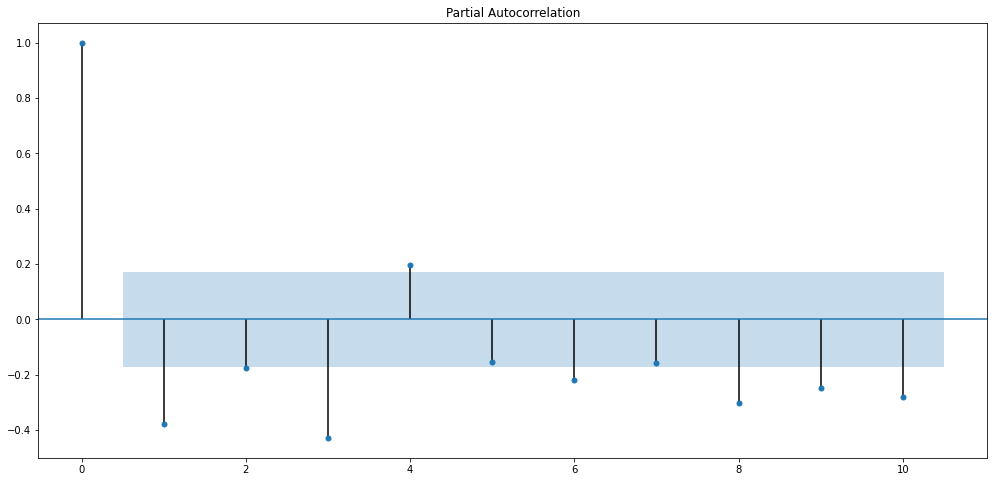

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(cust_stat_diff, lags=10)
plt.show()





### w) Tracer le PACF

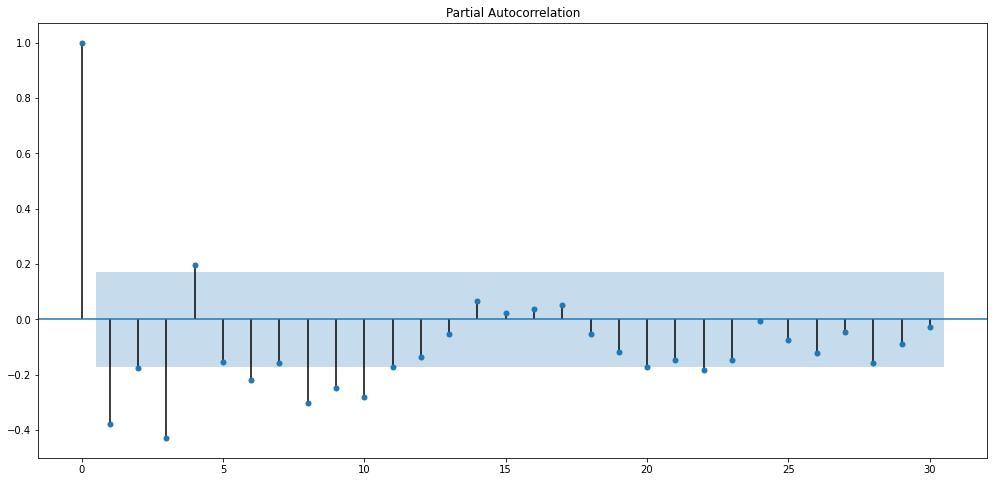

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(cust_stat_diff, ax=plt.gca(), lags=30)
plt.show()





# Bonus
### x) Chercher le modèle

In [ ]:
# 1.
# ACF : Le nombre optimal de terme MA (moyenne mobile) est de 9. 9 valeurs au dessus du seuil de signification
# Nous utiliserons 9 valeurs dans l'équation de la moyenne mobile.
# PACF: Le nombre optimale de terme à utiliser dans le modèle AR est de 5.5 valeurs au dessus du seuil de signification.
# Nous utiliserons 5 valeurs dans l'équation d'Auto Regression.
# Nous choisirons le modèle ARMA.

# 2. 
# ACF : Le nombre optimal de terme MA (moyenne mobile) est de 2. 2 valeurs au dessus du seuil de signification
# Nous utiliserons 2 valeurs dans l'équation de la moyenne mobile.
# PACF: Le nombre optimale de terme à utiliser dans le modèle AR est de 6.6 valeurs au dessus du seuil de signification.
# Nous utiliserons 6 valeurs dans l'équation d'Auto Regression.
# Nous choisirons le modèle ARMA.


